# Investigating well position effect: Scenario 4 (MAPK, LPAR1, Batch 6)
**Author:** Jessica Ewald <br>

Here we train on three plates and test on the fourth, all from the same batch. 

These results are for only one example: train on "2023-12-15_B4A3R1_P1T2", "2023-12-18_B4A3R1_P1T3", "2023-12-15_B4A3R1_P1T1", test on "2023-12-18_B4A3R1_P1T4". These plates are from batch 4. This scenario is most similar to our real analysis strategy. 

This version of scenario 4 compares different controls (MAPK and LPAR1) because the ALK WT and VAR both suffered from low cell viability. The protein channel here is therefore an even easier task. 

In [1]:
# Imports
import pathlib
import polars as pl
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt

import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY310,
)

import warnings
warnings.filterwarnings("ignore")

DEBUG:jupyter_black:config: {'line_length': 79, 'target_versions': {<TargetVersion.PY310: 10>}}


<IPython.core.display.Javascript object>

## All features (LPAR1-MAPK9)

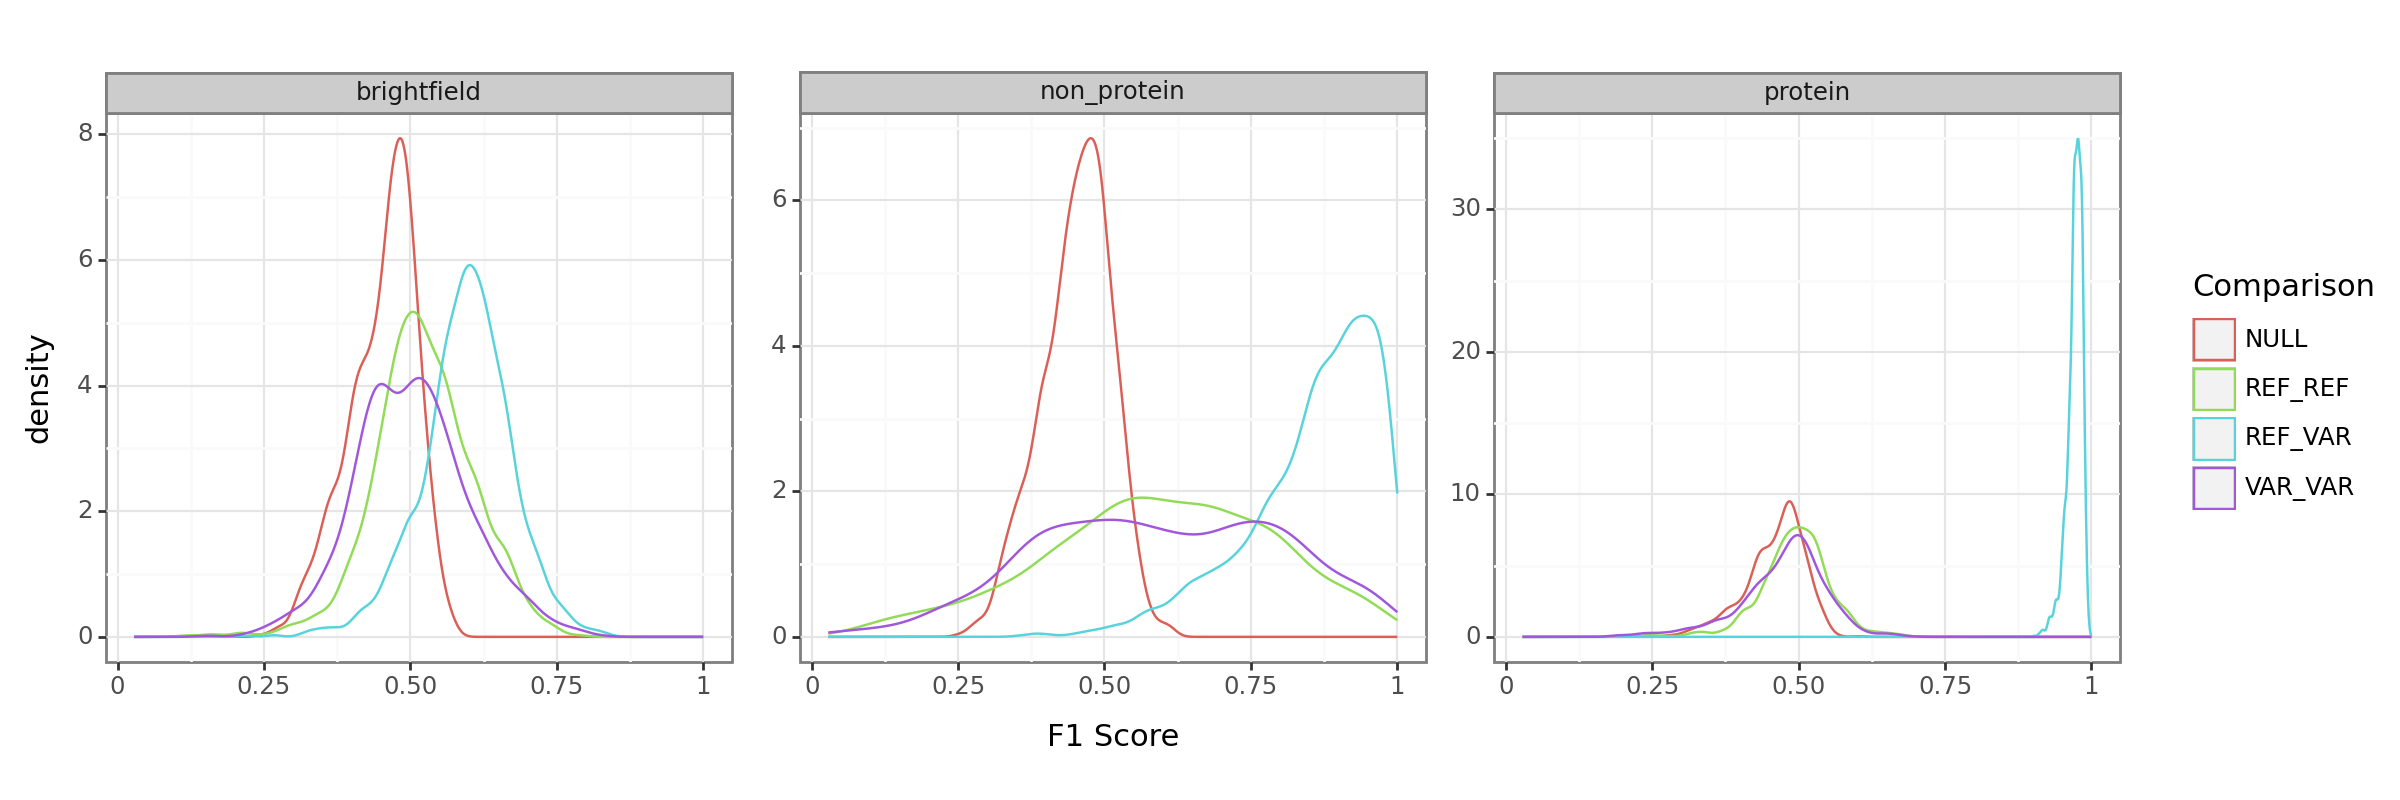

In [18]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_MAPK_LPAR1_30Apr2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["non_protein", "protein", "brightfield"]
# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")

# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (12,4)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)

## No correlation features (LPAR1-MAPK9)

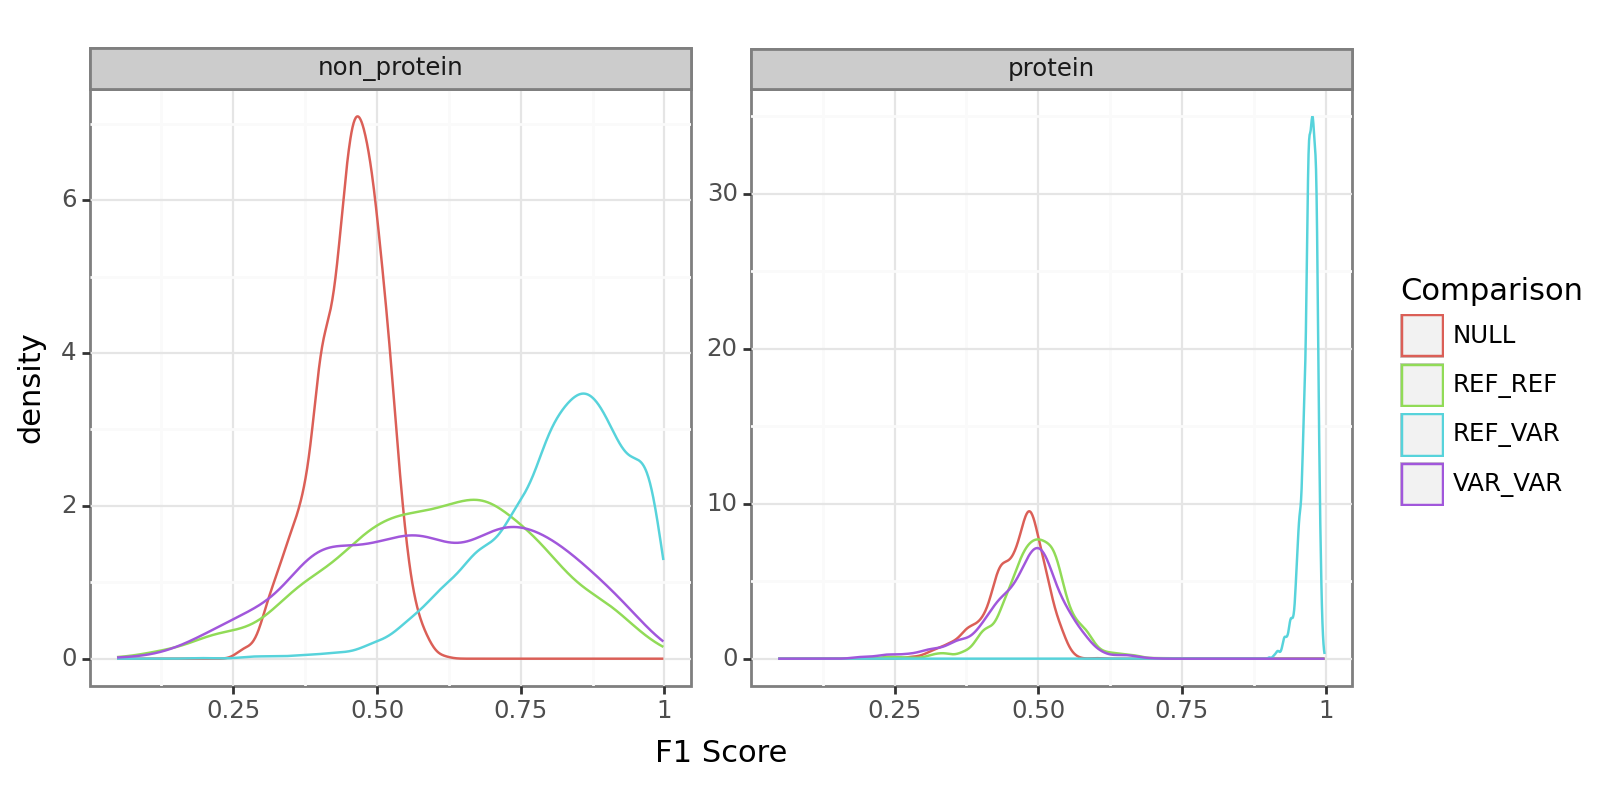

In [15]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_MAPK_LPAR1_no_corr_03May2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["non_protein", "protein"]


# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")
        
        
# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (8,4)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)

## Separate classifiers for each channel (LPAR1-MAPK9)

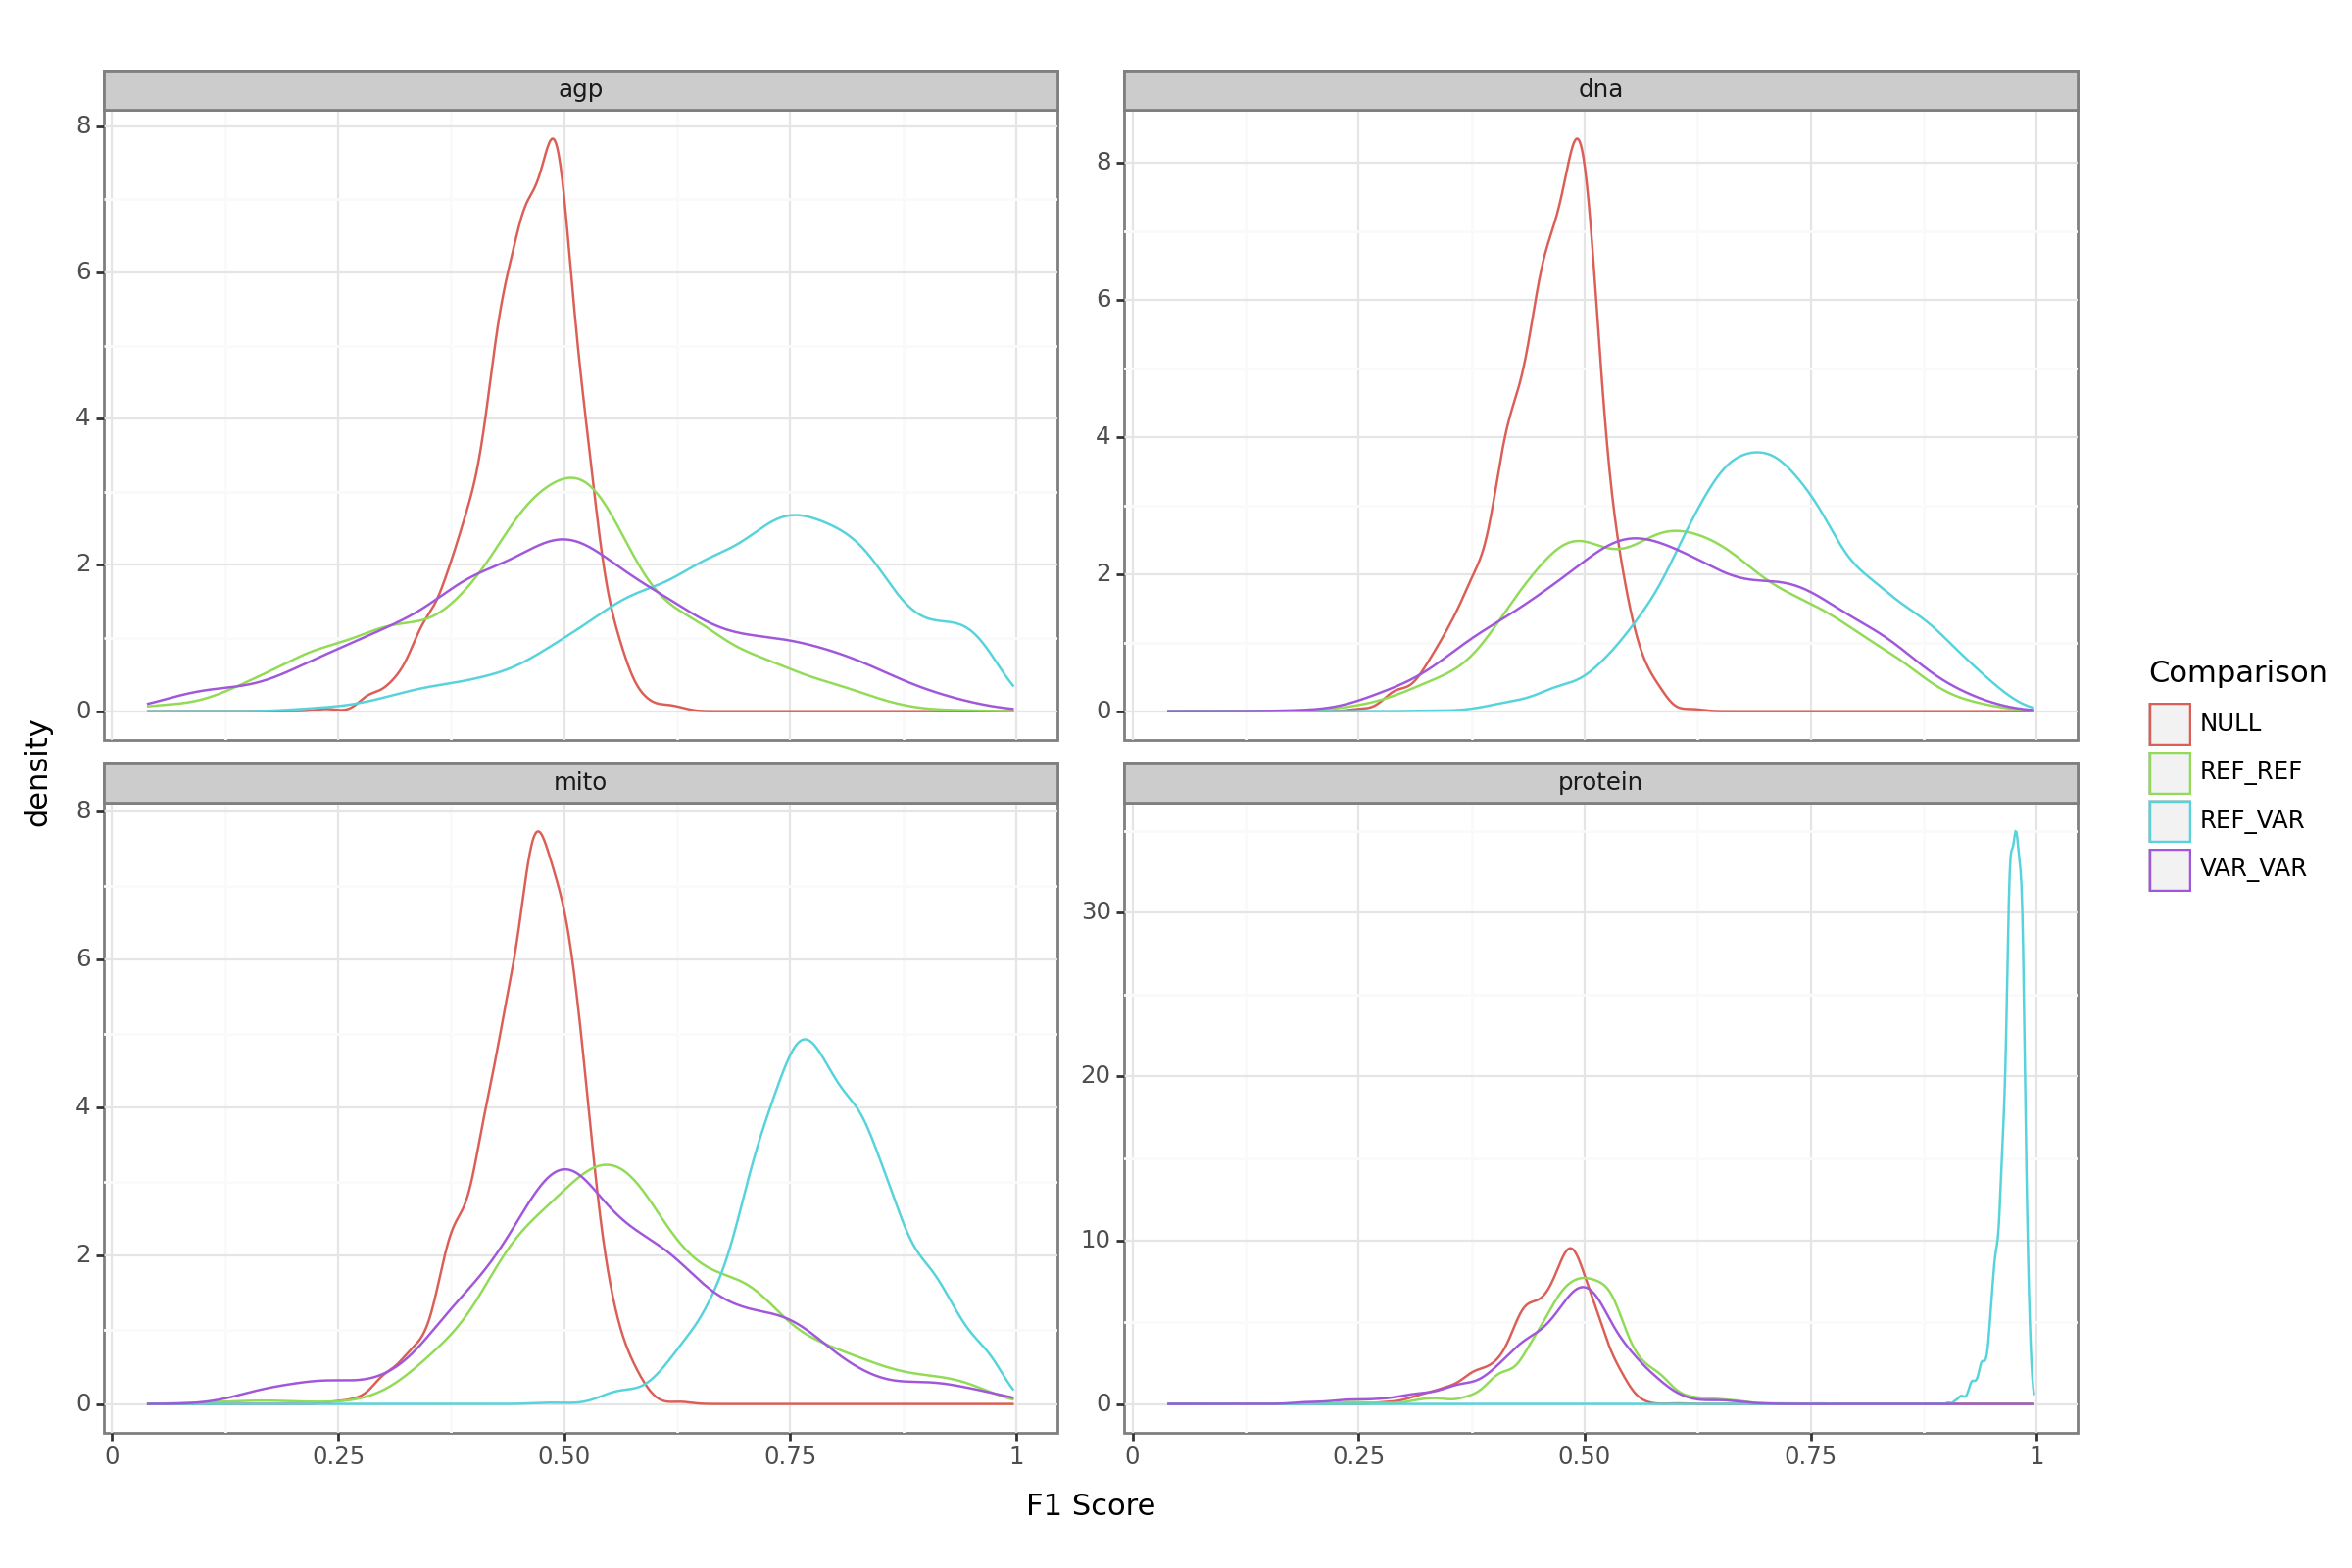

In [20]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_MAPK_LPAR1_sep_morph_06May2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["protein", "dna", "agp", "mito"]

# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")
        
# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (12,8)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)

## All features (ALK)

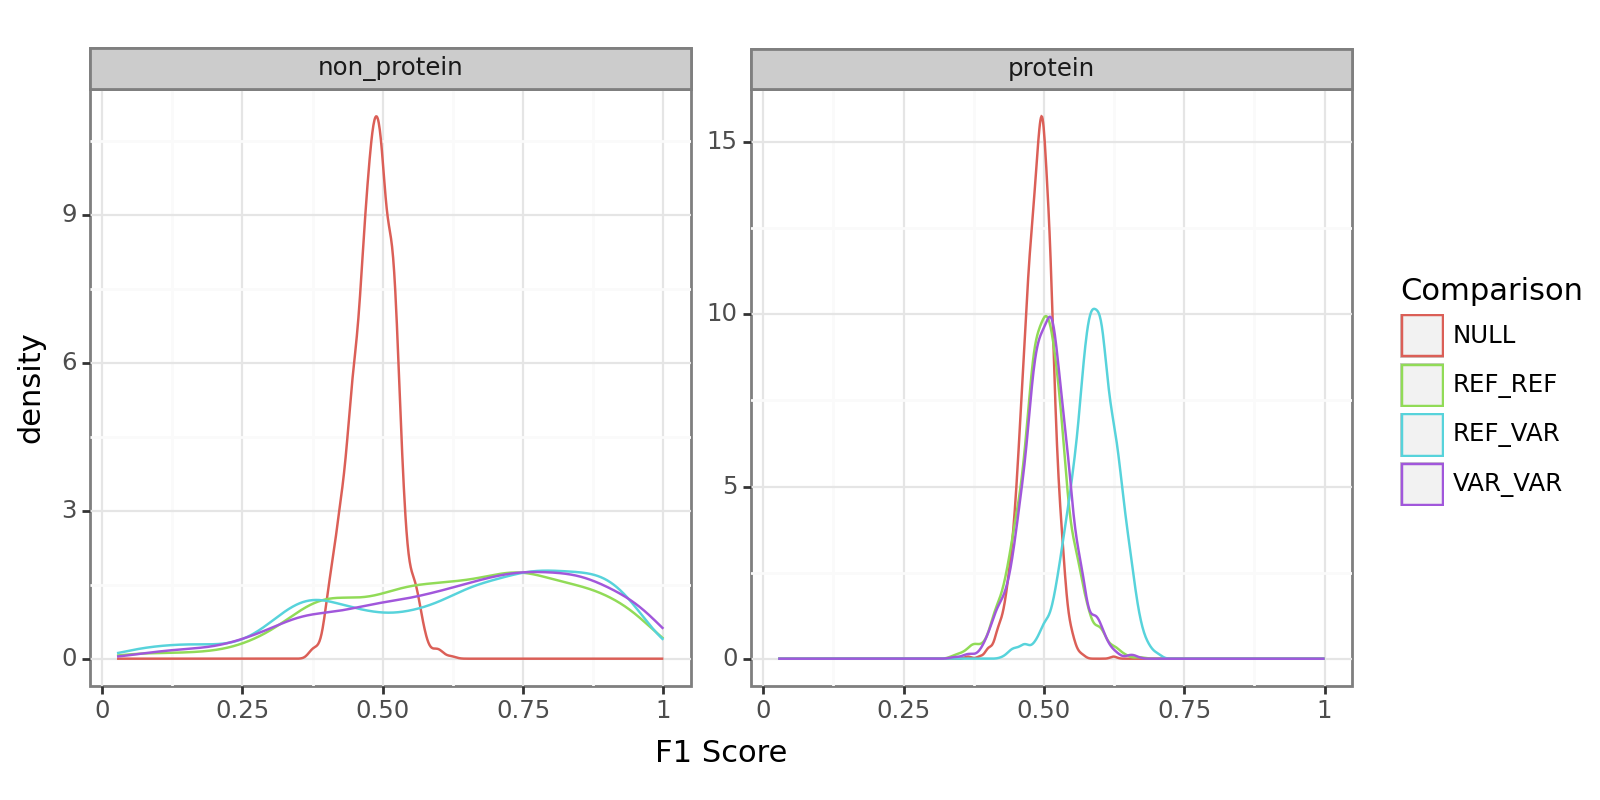

In [19]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_ALK_30Apr2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["non_protein", "protein"]


# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")
        
        
# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (8,4)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)

## No correlation features (ALK)

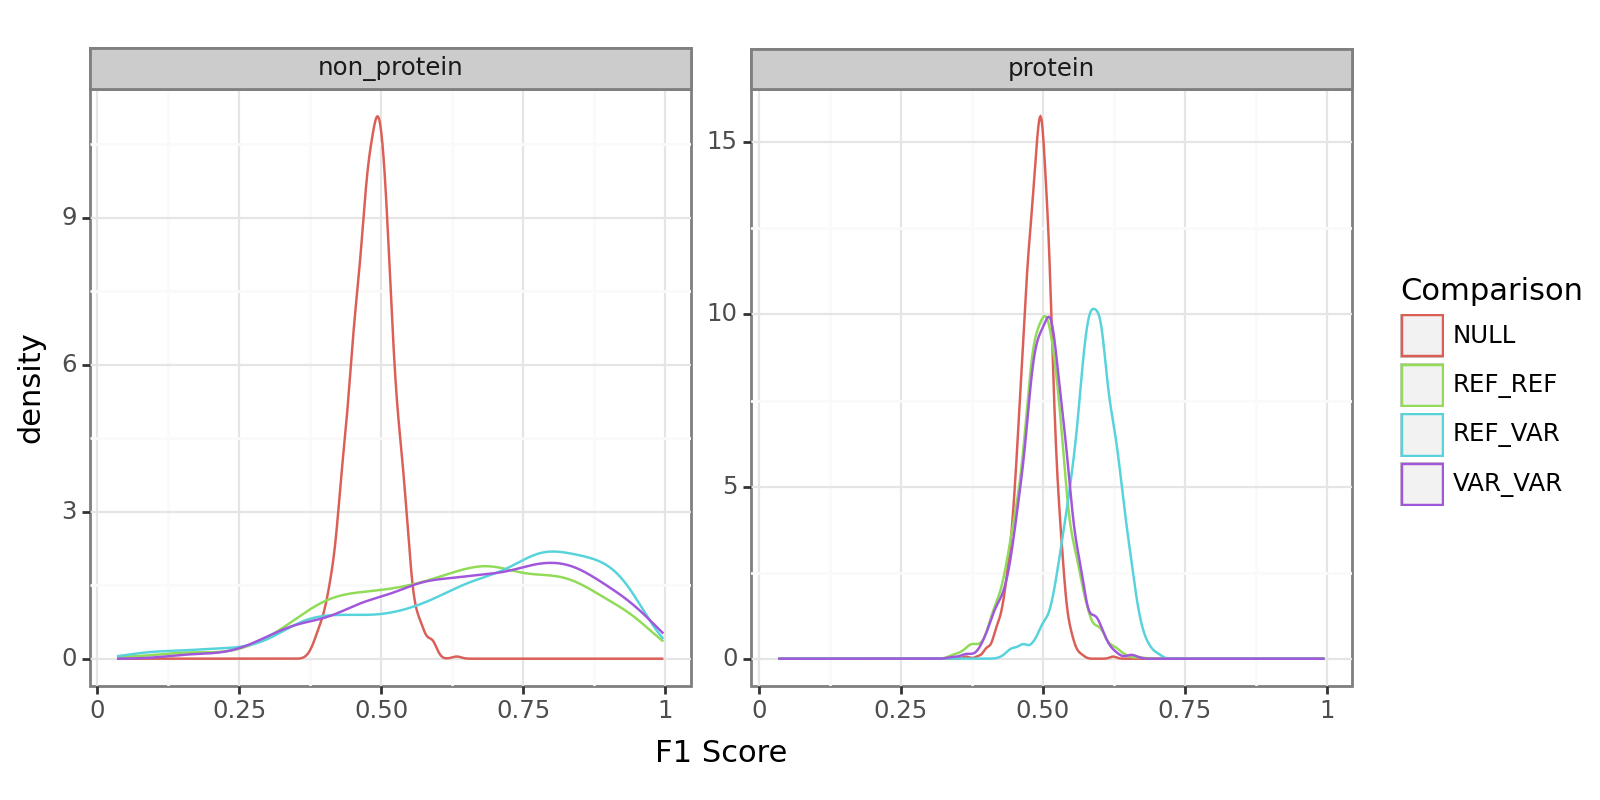

In [16]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_ALK_no_corr_02May2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["non_protein", "protein"]


# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")
        
        
# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (8,4)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)

## No correlation or intensity (ALK)

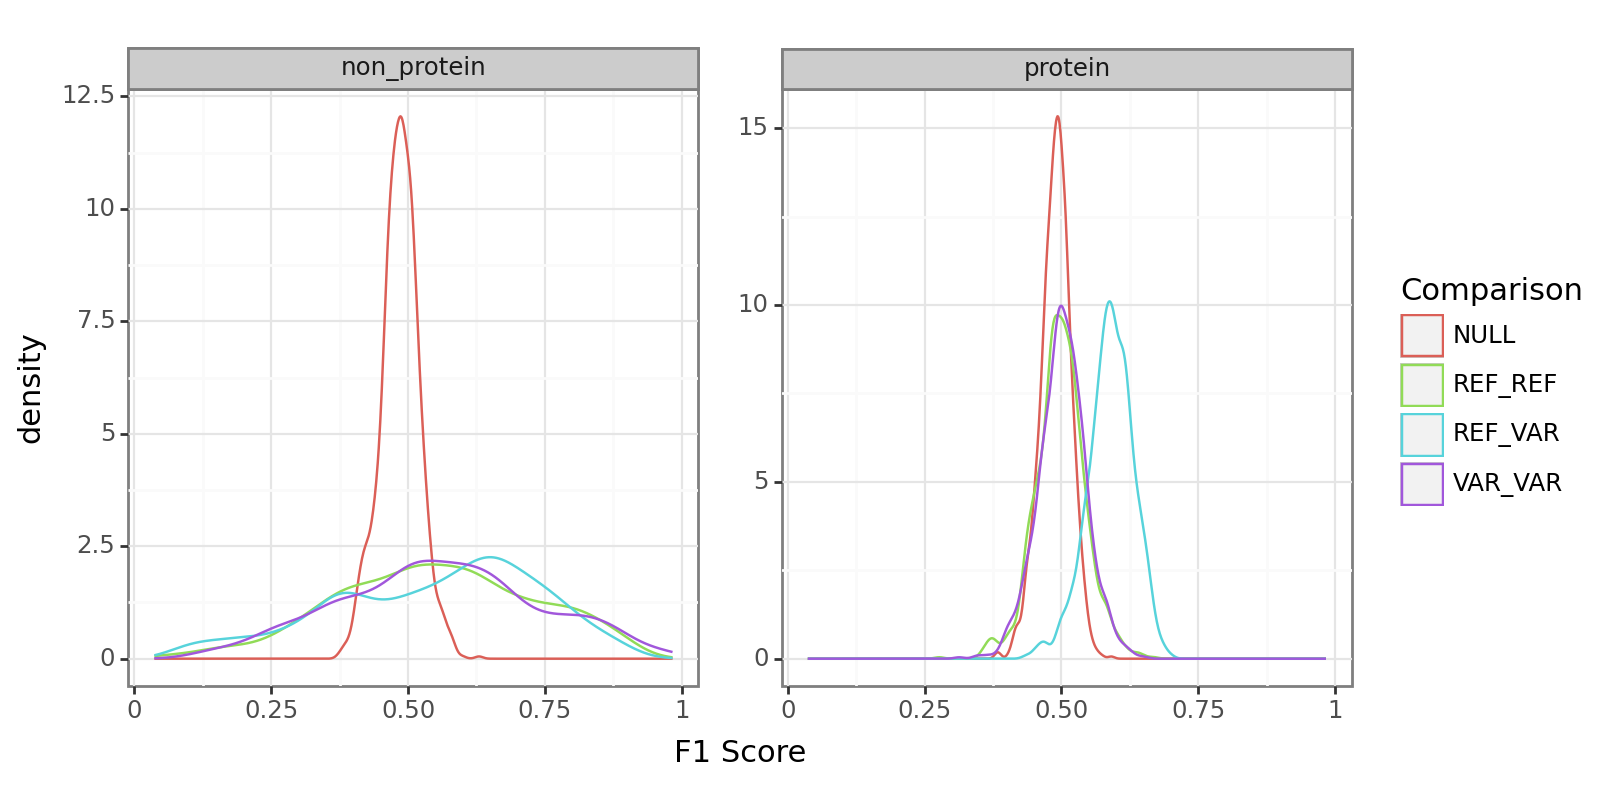

In [17]:
result_dir = pathlib.Path(
    f"/dgx1nas1/storage/data/jess/varchamp/sc_data/classification_results/Rep_Ctrls_scen4_B6_ALK_no_corr_intensity_02May2024"
)
batch = "Rep_Ctrls_scen4"
feature_sets = ["non_protein", "protein"]


# Read in all F1 score and plot
comparisons = [
    "REF_control_f1score",
    "VAR_control_f1score",
    "NULL_control_f1score",
    "f1score",
]
comp_dict = {
    "REF_control_f1score": "REF_REF",
    "VAR_control_f1score": "VAR_VAR",
    "NULL_control_f1score": "NULL",
    "f1score": "REF_VAR",
}

f1_score = pl.DataFrame()
for fs in feature_sets:
    for comp in comparisons:

        df = pl.read_csv(
            f"{result_dir}/Rep_Ctrls_scen4_{fs}_{comp}_normalized_feature_selected.csv"
        )

        if "Reference_Well" in df.columns:
            df = df.rename(
                {"Reference_Well": "Well_One", "Variant_Well": "Well_Two"}
            )

        df = df.melt(id_vars=["Well_One", "Well_Two"]).with_columns(
            pl.lit(fs).alias("Feature_Set"),
            pl.lit(comp_dict[comp]).alias("Comparison"),
            pl.lit(batch).alias("Batch"),
        )
        f1_score = pl.concat([f1_score, df], how="vertical")
        
        
# try histograms with ggplot
import plotnine as pn
from plotnine import ggplot, aes, geom_density, theme_bw, xlab, facet_wrap, theme

pn.options.figure_size = (8,4)

plot1 = (ggplot(f1_score.filter(pl.col("variable") == "F1_Score").to_pandas()) 
+ aes(x = "value", color="Comparison")
+ facet_wrap("Feature_Set", scales='free_y')
+ geom_density()
+ theme_bw()
+ xlab("F1 Score"))

print(plot1)